## 데이터 가져오기

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras import datasets

In [4]:
mnist = datasets.mnist

In [5]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

- train_x: (60000, 28, 28) --> train_x[60000][28][28]
- train_y: (60000,) --> train_y[60000]

In [7]:
type(train_x), type(train_y)

(numpy.ndarray, numpy.ndarray)

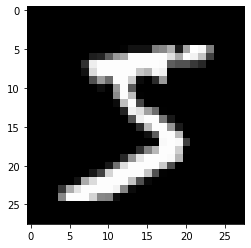

In [8]:
plt.imshow(train_x[0], 'gray')
plt.show()

In [9]:
train_y[0]

5

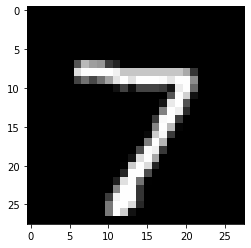

In [10]:
plt.imshow(test_x[0], 'gray')
plt.show()

In [11]:
test_y

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

## layer
 - (batch_size, height, width, channel)의 4D 형태를 입력으로 받는다!!

In [15]:
train_x[0].shape #img[28][28] 가 8장 -> img[8][28][28][1]

(28, 28)

In [20]:
a= train_x[0]
a.shape

(28, 28)

In [21]:
a= train_x[0]
a = np.expand_dims(a, 2)
a.shape

(28, 28, 1)

In [23]:
a= train_x[0]
a= a[..., tf.newaxis]
a.shape

(28, 28, 1)

In [24]:
a= train_x[0]
a= a[:,:, tf.newaxis]
a.shape

(28, 28, 1)

In [25]:
a= train_x[0]
a= a[:, tf.newaxis ,:] 
#a = np.expand_dims(a, 1)
a.shape

(28, 1, 28)

In [30]:
images = train_x[0:8]
images.shape

(8, 28, 28)

In [31]:
images = images[...,tf.newaxis]
images.shape

(8, 28, 28, 1)

In [32]:
layer = tf.keras.layers.Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='SAME', activation='relu')

In [35]:
images.dtype

dtype('uint8')

In [38]:
images_f= tf.cast(images, dtype=tf.float32)
images_f.dtype

tf.float32

In [40]:
images_f2= np.array(images, dtype=np.float32)
images_f2.dtype

dtype('float32')

In [45]:
#output= tf.keras.layers.Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='SAME', activation='relu')(image_f)
output = layer(images_f)
output.shape, images_f.shape

(TensorShape([8, 28, 28, 3]), TensorShape([8, 28, 28, 1]))

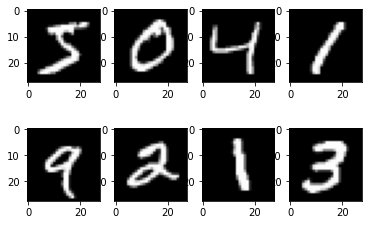

In [44]:
plt.subplot(241),plt.imshow(images[0,:,:,0], 'gray')
plt.subplot(242),plt.imshow(images[1,:,:,0], 'gray')
plt.subplot(243),plt.imshow(images[2,:,:,0], 'gray')
plt.subplot(244),plt.imshow(images[3,:,:,0], 'gray')
plt.subplot(245),plt.imshow(images[4,:,:,0], 'gray')
plt.subplot(246),plt.imshow(images[5,:,:,0], 'gray')
plt.subplot(247),plt.imshow(images[6,:,:,0], 'gray')
plt.subplot(248),plt.imshow(images[7,:,:,0], 'gray')
plt.show()

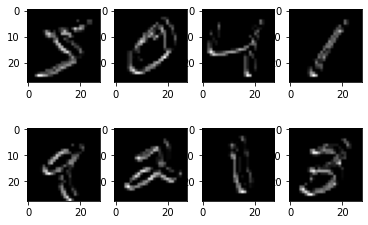

In [46]:
plt.subplot(241),plt.imshow(output[0,:,:,0], 'gray')
plt.subplot(242),plt.imshow(output[1,:,:,0], 'gray')
plt.subplot(243),plt.imshow(output[2,:,:,0], 'gray')
plt.subplot(244),plt.imshow(output[3,:,:,0], 'gray')
plt.subplot(245),plt.imshow(output[4,:,:,0], 'gray')
plt.subplot(246),plt.imshow(output[5,:,:,0], 'gray')
plt.subplot(247),plt.imshow(output[6,:,:,0], 'gray')
plt.subplot(248),plt.imshow(output[7,:,:,0], 'gray')
plt.show()

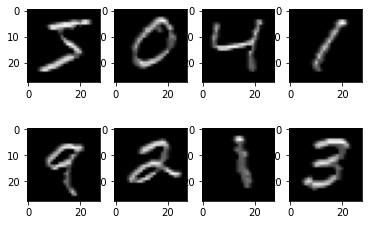

In [47]:
channel=2
plt.subplot(241),plt.imshow(output[0,:,:,channel], 'gray')
plt.subplot(242),plt.imshow(output[1,:,:,channel], 'gray')
plt.subplot(243),plt.imshow(output[2,:,:,channel], 'gray')
plt.subplot(244),plt.imshow(output[3,:,:,channel], 'gray')
plt.subplot(245),plt.imshow(output[4,:,:,channel], 'gray')
plt.subplot(246),plt.imshow(output[5,:,:,channel], 'gray')
plt.subplot(247),plt.imshow(output[6,:,:,channel], 'gray')
plt.subplot(248),plt.imshow(output[7,:,:,channel], 'gray')
plt.show()

In [48]:
weight = layer.get_weights()

In [52]:
weight, type(weight)

([array([[[[-0.22349839,  0.32563102, -0.36858314]],
  
          [[ 0.1952576 , -0.36110848, -0.0238806 ]],
  
          [[ 0.33198714,  0.08477205, -0.04833704]]],
  
  
         [[[ 0.06076834, -0.39886618,  0.18338722]],
  
          [[-0.18679091,  0.37070912, -0.06981659]],
  
          [[-0.11167216,  0.40214908, -0.01875383]]],
  
  
         [[[ 0.22155726, -0.11551109,  0.2881819 ]],
  
          [[-0.20799425, -0.08111006,  0.26238418]],
  
          [[-0.04098433,  0.38441014,  0.01811647]]]], dtype=float32),
  array([0., 0., 0.], dtype=float32)],
 list)

In [55]:
weight[0].shape, weight[1].shape

((3, 3, 1, 3), (3,))

In [57]:
weight[0][:,:,0,0], weight[0][:,:,0,1], weight[0][:,:,0,2]
#3x3 곱해줌

(array([[-0.22349839,  0.1952576 ,  0.33198714],
        [ 0.06076834, -0.18679091, -0.11167216],
        [ 0.22155726, -0.20799425, -0.04098433]], dtype=float32),
 array([[ 0.32563102, -0.36110848,  0.08477205],
        [-0.39886618,  0.37070912,  0.40214908],
        [-0.11551109, -0.08111006,  0.38441014]], dtype=float32),
 array([[-0.36858314, -0.0238806 , -0.04833704],
        [ 0.18338722, -0.06981659, -0.01875383],
        [ 0.2881819 ,  0.26238418,  0.01811647]], dtype=float32))

In [58]:
weight[1] #보통 0또는 0에 가까운 숫자
# bias: 더해주는 값

array([0., 0., 0.], dtype=float32)

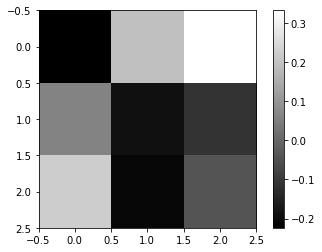

In [60]:
plt.imshow(weight[0][:,:,0,0], 'gray')
plt.colorbar()
plt.show()

In [62]:
np.min(output), np.max(output)

(0.0, 265.0529)

In [ ]:
layer = tf.keras.layers.Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='SAME')
#relu가 없으면 np.min값이 음수가 나옴